Correlation between Bytes and Packets: 0.06756100593364407


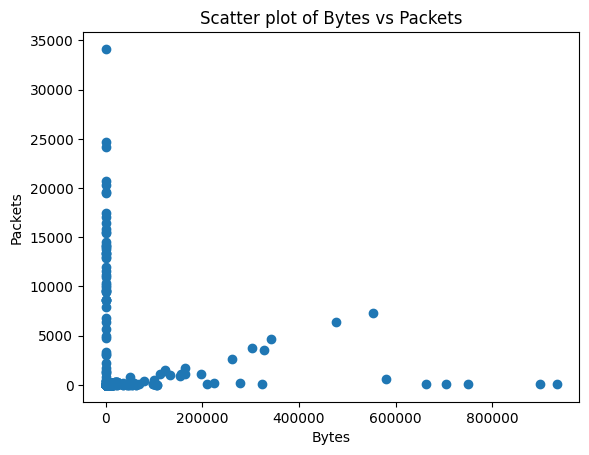

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#load the data
df = pd.read_csv('./dataset/syslogs1.csv')

# take only column class, 'Bytes' and 'Packets'
df = df[['class', 'Bytes', 'Packets']]

# print(df.head())

#convert those columns to numeric
df['Bytes'] = pd.to_numeric(df['Bytes'])
df['Packets'] = pd.to_numeric(df['Packets'])

correlation = df['Bytes'].corr(df['Packets'])
print("Correlation between Bytes and Packets:", correlation)

plt.scatter(df['Bytes'], df['Packets'])
plt.xlabel('Bytes')
plt.ylabel('Packets')
plt.title('Scatter plot of Bytes vs Packets')
plt.show()


Since, the correlation shows that it's 0.06756 which is close to 0. So, there is a very weak positive linear relationship between the two variables.

Limiatations: It's important to note that correlation does not imply causation. While these variables may move together, it does not necessarily mean that changes in one variable are causing changes in the other. 

Also, the Pearson correlation only measures linear relationships. It's possible that 'Bytes' and 'Packets' have a non-linear relationship that the Pearson correlation is not capturing. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Convert class labels to numeric
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Split the data into features (X) and target (y)
X = df[['Bytes', 'Packets']]
y = df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      normal       1.00      0.99      1.00      9924
  suspicious       0.93      0.99      0.96     21477
     unknown       0.93      0.53      0.67      3167

    accuracy                           0.95     34568
   macro avg       0.95      0.84      0.88     34568
weighted avg       0.95      0.95      0.95     34568

